In [2]:
# %load run_kimimaro.py
import pdb
import h5py
import numpy as np
import kimimaro
import matplotlib.pyplot as plt
import pickle
from spinecode import mesh, skel

def loadh5py(path, vol="main"):
    return np.array(h5py.File(path, 'r')[vol]).squeeze()

def writeh5_file(file, filename):
    hf = h5py.File(filename, 'w')
    hf.create_dataset('main', data=file)
    hf.close()

# LISTING 1: Producing Skeletons from a labeled image.
def skeletonize(labels, scale, const, obj_ids):
    skels = kimimaro.skeletonize(
      labels, 
      teasar_params={
        'scale': scale,
        'const': const, # physical units
        'pdrf_exponent': 4,
        'pdrf_scale': 100000,
        'soma_detection_threshold': 1100, # physical units
        'soma_acceptance_threshold': 3500, # physical units
        'soma_invalidation_scale': 1.0,
        'soma_invalidation_const': 300, # physical units
        'max_paths': 50, # default  None
      },
      object_ids= obj_ids, # process only the specified labels
      # object_ids=[ ... ], # process only the specified labels
      # extra_targets_before=[ (27,33,100), (44,45,46) ], # target points in voxels
      # extra_targets_after=[ (27,33,100), (44,45,46) ], # target points in voxels
      dust_threshold=500, # skip connected components with fewer than this many voxels
#       anisotropy=(30,30,30), # default True
      anisotropy=(32,32,30), # default True
      fix_branching=True, # default True
      fix_borders=True, # default True
      progress=True, # default False, show progress bar
      parallel=4, # <= 0 all cpu, 1 single process, 2+ multiprocess
      parallel_chunk_size=100, # how many skeletons to process before updating progress bar
    )
    return skels

if False:
    from run_kimimaro import *

if __name__ == '__main__':
    print('start')

#     dendrite_ids = np.loadtxt('mito_len500_bead_pair.txt', int)[:,1]
#     dendrite_ids = np.loadtxt('data/seg_spiny_v2.txt', int)

    
    # dendrites; task 1
#     seg_fn = '/n/pfister_lab2/Lab/donglai/mito/db/30um_human/segv2_16nm.h5'
#     obj_ids = np.loadtxt('/n/pfister_lab2/Lab/nils/snowproject/hum_segv2/ui500.txt')
#     out_f = '/n/pfister_lab2/Lab/nils/snowproject/hum_segv2/skel_16nmv2_kimi/'

    #mito; task 2 [CELINE]
    seg_fn = '/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_64nm.h5'
    obj_ids = np.loadtxt('/n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_len500_bead.txt', int)
    oid = obj_ids[obj_ids>0]
    out_f = '/n/pfister_lab2/Lab/silin/'
    
    
    # no crumbs
    print('Load segmentation from {}'.format(seg_fn))
    labels = loadh5py(seg_fn)
    
    if True:
        skels = skeletonize(labels, 4, 500, obj_ids=oid.tolist())
        #save skeleton
        print('save skel at {}'.format(out_f))
        with open('{}/skeleton3.p'.format(out_f), 'wb') as fp:
            pickle.dump(skels, fp, protocol=pickle.HIGHEST_PROTOCOL)
    else:
        skels = np.load('{}/skeleton.p'.format(out_f), allow_pickle=True)

    # get special information:  
    if False:
        sl = [[k, len(skels[k].vertices),  skels[k].radius.mean()] for k in skels]    
        writeh5_file(sl, '{}/skel_len.h5'.format(out_f))
    

    print('done')

    
    
    # Try things out in console:
#     print('run skeleton --> dendrites and spines')
#     skels.keys()
#     dir(skels[1499496])    
#     skels[1499496].viewer()    
#     skel_labels = skel.label_skeleton(skels[1499496])
#     dir(skel_labels)
#     skels[1499496].vertices *= skel_labels 
        
#     skel_labels.max()    
    
#     rl = skels[1499496].clone()
#     rl.radius[skel_labels==0] = 0
#     rl.radius[skel_labels==1] = 0
#     rl.viewer()
    

#     go = skels[12954].vertices
#     with h5py.File('12954.h5', 'w') as f:
#           dset = f.create_dataset("default", data=go)



start
Load segmentation from /n/pfister_lab2/Lab/donglai/mito/db/30um_rat/mito_64nm.h5


Skeletonizing Labels:  79%|███████▉  | 143/181 [00:03<00:00, 39.58it/s]


save skel at /n/pfister_lab2/Lab/silin/
done


In [13]:
print('run skeleton --> dendrites and spines')

run skeleton --> dendrites and spines


In [47]:
skel_labels = skel.label_skeleton(skels[5628])

In [3]:
go = skels[12954].vertices

In [46]:
sum (skel_labels == 0)

0

/n/home13/silin/anaconda3/envs/ng/lib/python3.8/site-packages/cloudvolume/skeleton.py:1133: RuntimeWarning: invalid value encountered in true_divide
  normed_radii = skel.radii / np.max(skel.radii)
/n/home13/silin/anaconda3/envs/ng/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


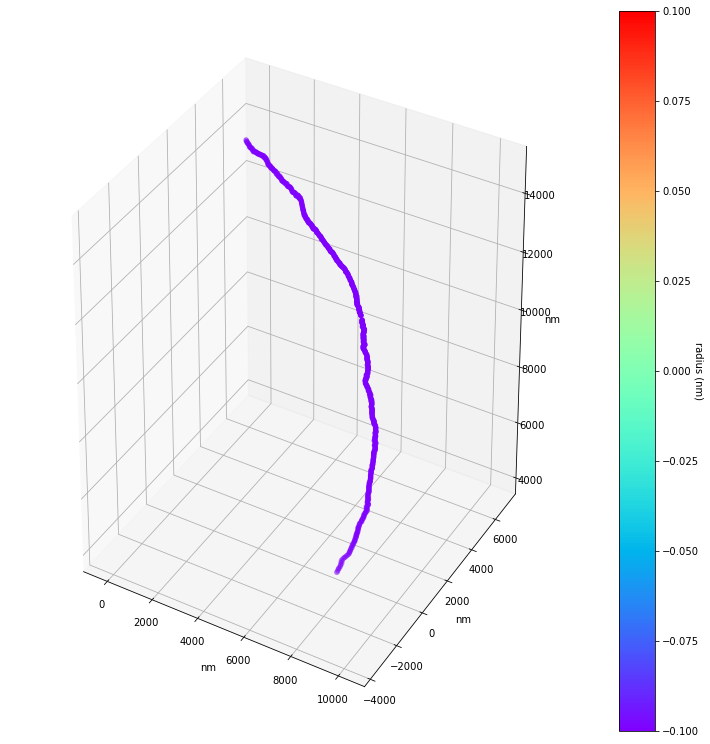

In [52]:
rl = skels[5628].clone()
rl.radius[skel_labels==0] = 1
rl.radius[skel_labels==1] = 0
rl.viewer()